In this code, first, a function named "function" is defined which implements the desired function, (y = 2 sin(x) + sin(2x)). Then, training data is generated. The neural network architecture consists of two hidden layers, each with 48 neurons. The Mean Absolute Error (MAE) loss function is used to train the network.

After training the network, the model is evaluated with the training data, and the MAE value is printed. Then, using the trained model, predictions are made for the training data, and the results are compared on a plot.

This network has diffrent power to interpolation and extrapolation.

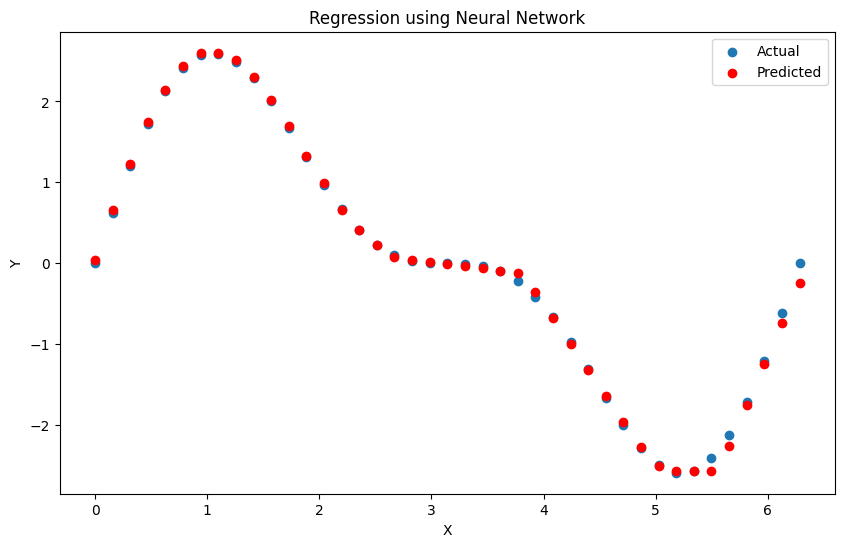

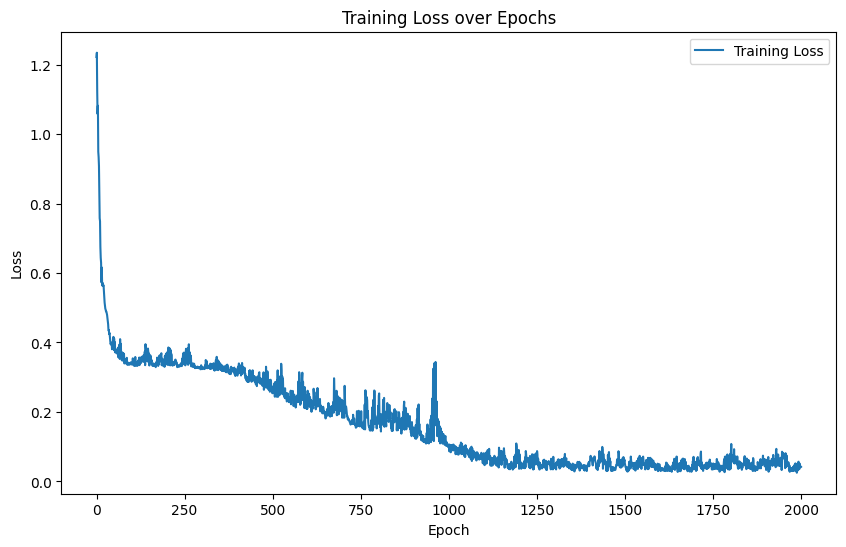

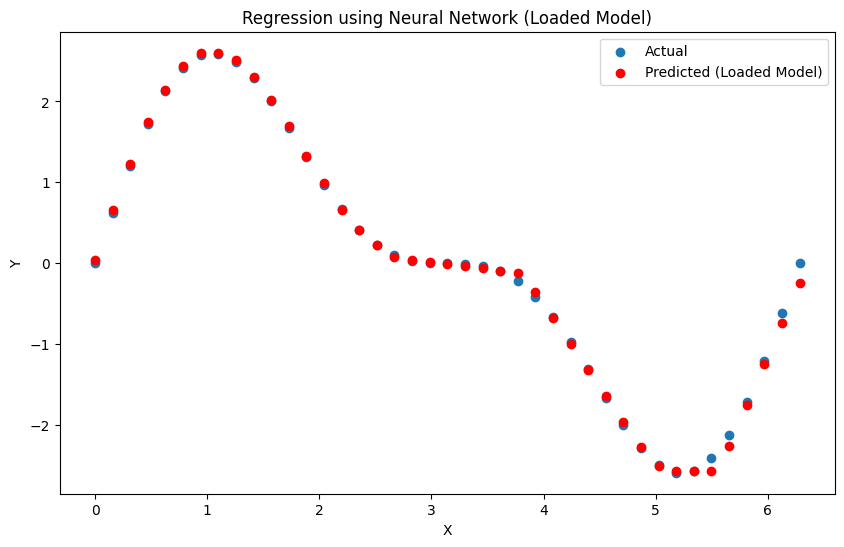

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# genarating data
X_train = np.linspace(0, 2*np.pi, 41)
y_train = 2*np.sin(X_train) + np.sin(2*X_train)

#convert data to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# define nn class
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(1, 48)
        self.fc2 = nn.Linear(48, 48)
        self.fc3 = nn.Linear(48, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))  # activation function 1 = relu
        x = self.relu(self.fc2(x))  # activation function 2 = relu
        x = self.fc3(x)
        return x

# build nn model
model = NeuralNet()

# define cost function and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# training model
epochs = 2000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

#convert training data to numpy array
X_train_np = X_train_tensor.detach().numpy().flatten()
y_pred_train_np = model(X_train_tensor).detach().numpy().flatten()

# plot figures
plt.figure(figsize=(10, 6))
plt.scatter(X_train_np, y_train, label='Actual')
plt.scatter(X_train_np, y_pred_train_np, color='r', label='Predicted')
plt.title('Regression using Neural Network')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# plot loss
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# save model
torch.save(model.state_dict(), 'model.pth')

# delete model
del model

# build model
model = NeuralNet()

# load model weights
model.load_state_dict(torch.load('model_q3.pth'))

# evaluation model
model.eval()

# predict with loaded model
y_pred_train_np_loaded = model(X_train_tensor).detach().numpy().flatten()

# plot figures with loaded model
plt.figure(figsize=(10, 6))
plt.scatter(X_train_np, y_train, label='Actual')
plt.scatter(X_train_np, y_pred_train_np_loaded, color='r', label='Predicted (Loaded Model)')
plt.title('Regression using Neural Network (Loaded Model)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
